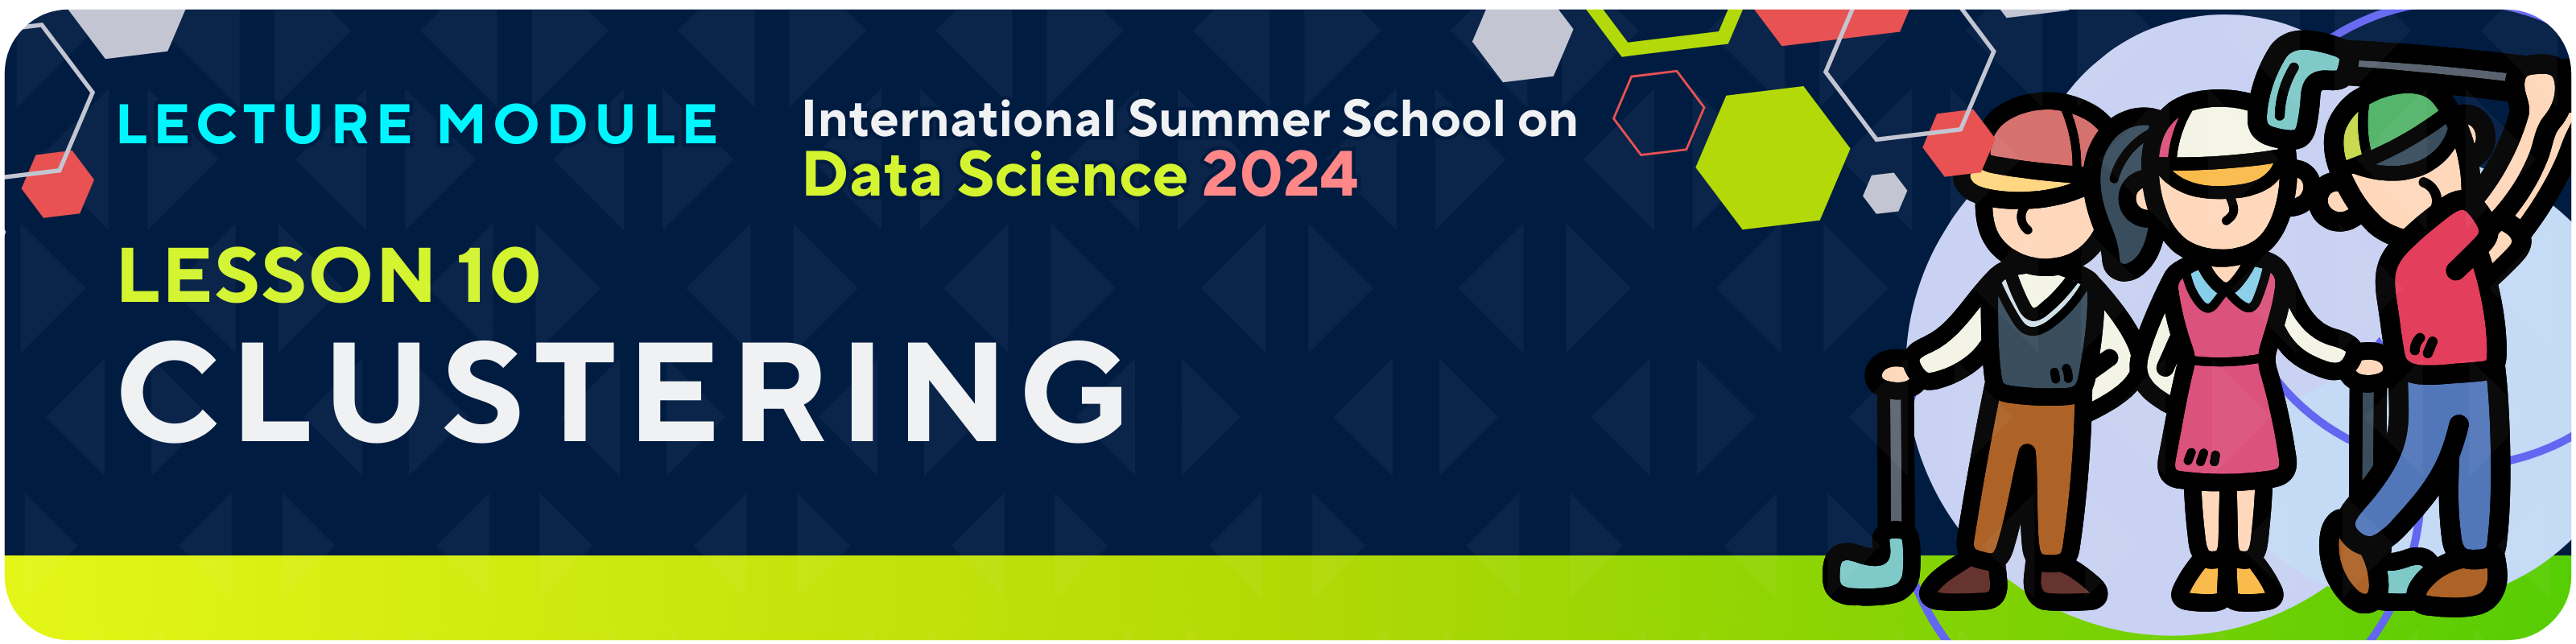

<div class='markdown-google-sans'>

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Intro To Clustering**
</div>

<img src="https://i.imgur.com/fFds9sC.png" width=800 />

<img src="https://i.imgur.com/TIbAARp.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Notable Uses of Clustering**
</div>
<img src="https://i.imgur.com/KCvvqRK.png" width=800 />

<img src="https://i.imgur.com/ZMIHy1w.png" width=800 />

<img src="https://i.imgur.com/7IlNVwk.png" width=800 />

<img src="https://i.imgur.com/ERbce3N.png" width=800 />

<img src="https://i.imgur.com/eyuH3gQ.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Clustering Goals**
</div>
<img src="https://i.imgur.com/GWTUWvC.png" width=800 />

<img src="https://i.imgur.com/OXFXUkt.png" width=800 />

<img src="https://i.imgur.com/z6pju97.png" width=800 />



<div class='markdown-google-sans'>

### **<font color=#819A00> Clustering Methods**
</div>
<img src="https://i.imgur.com/1lNoaNn.png" width=800 />

<img src="https://i.imgur.com/GB2wHNy.png" width=800 />


---
---

<div class='markdown-google-sans'>

## **10.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Clustering: Centroid-Based**
</div>
<img src="https://i.imgur.com/HxN09Ga.png" width=800 />

<img src="https://i.imgur.com/98oGF8p.png" width=800 />




<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

In [ ]:
import matplotlib

# Function for drawing the points and cluster
def draw_data_points(df):
    X_train = df.copy()
    if 'Cluster' not in X_train.columns:
        X_train['Cluster'] = -1

    colors = ['#F8C079', '#6CD58E', '#D8B3FE', '#EBD15A', '#6ED5E5', '#F8A9C4', '#FFFFFF']

    # Calculate centroids and foci for each cluster
    centroids = X_train.groupby('Cluster')[[numerical_cols[0], numerical_cols[1]]].mean()
    foci = X_train.groupby('Cluster').apply(lambda x: x.iloc[np.argmax(np.sqrt(np.sum((x[[numerical_cols[0], numerical_cols[1]]] - centroids.loc[x.name])**2, axis=1)))])

    # Plot the data points and centroid ellipses
    plt.figure(figsize=(2.5, 2.5), dpi=300)
    for i, (x, y) in enumerate(zip(X_train[numerical_cols[0]], X_train[numerical_cols[1]])):
        plt.scatter(x, y, c='#212121', edgecolor=colors[X_train['Cluster'][i]], alpha=0.9, s=300, lw=2, zorder=3)
        plt.text(x, y-0.01, str(X_train.index[i]), color='white', fontsize=10, fontweight='bold', ha='center', va='center')

    for cluster, color in enumerate(colors):
        if cluster in centroids.index:
            center = centroids.loc[cluster]
            focal_point = foci.loc[cluster][[numerical_cols[0], numerical_cols[1]]]
            reflected_focal_point = 2 * center - focal_point
            distance = np.sqrt(np.sum((focal_point - center)**2))
            a = distance + 0.35
            b = np.sqrt(a**2 - distance**2)
            angle = np.arctan2(focal_point[numerical_cols[1]] - center[numerical_cols[1]], focal_point[numerical_cols[0]] - center[numerical_cols[0]])
            ellipse = matplotlib.patches.Ellipse(center, 2*a, 2*b, angle=np.degrees(angle), color=color, alpha=0.3)
            plt.gca().add_patch(ellipse)

    # Change the color of the axes and axis text
    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    ax.set_xlim([-2, 1.7])
    ax.set_ylim([-1.5, 2.2])
    plt.show()

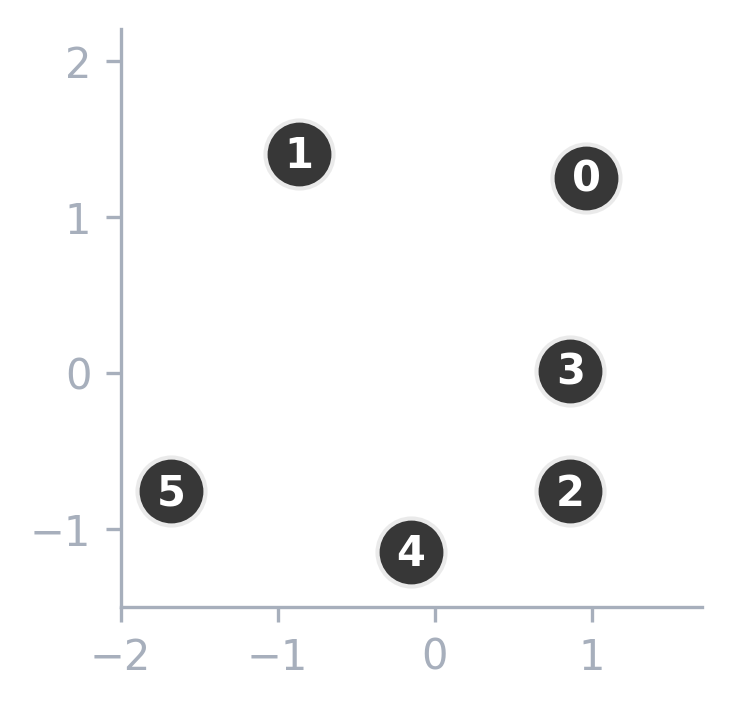

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Provided data
df = pd.DataFrame({
    'Temperature': [84,66,83,83,73,58],
    'Humidity': [73,75,47,57,42,47]
})

X_train = df.copy()

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

draw_data_points(X_train)

<div class='markdown-google-sans'>

### **Kmeans**
</div>
<img src="https://i.imgur.com/KgMQLBf.png" width=800 />


<img src="https://i.imgur.com/nanxqYs.png" width=800 />

<img src="https://i.imgur.com/JFryDSp.png" width=800 />

<img src="https://i.imgur.com/zcAImty.png" width=800 />

<img src="https://i.imgur.com/85ALb6S.png" width=800 />

<img src="https://i.imgur.com/UW7uQBt.png" width=800 />

<img src="https://i.imgur.com/EZcMtF8.png" width=800 />

<img src="https://i.imgur.com/GSS9oj8.png" width=800 />

<img src="https://i.imgur.com/tq4X19u.png" width=800 />


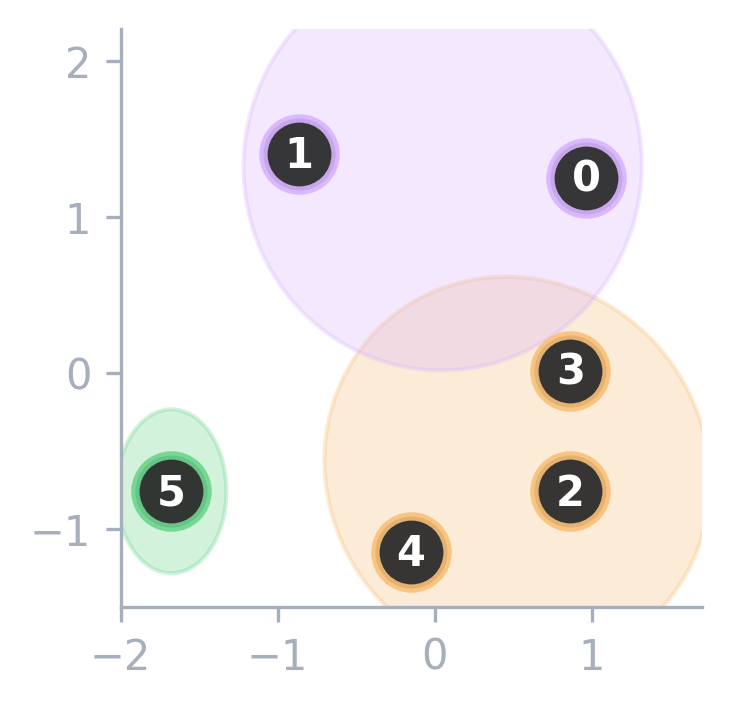

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 3
clustering = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<div class='markdown-google-sans'>

### **KMedoids**
</div>

<img src="https://i.imgur.com/36u0URX.png" width=800 />


In [ ]:
!pip install scikit-learn-extra -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00


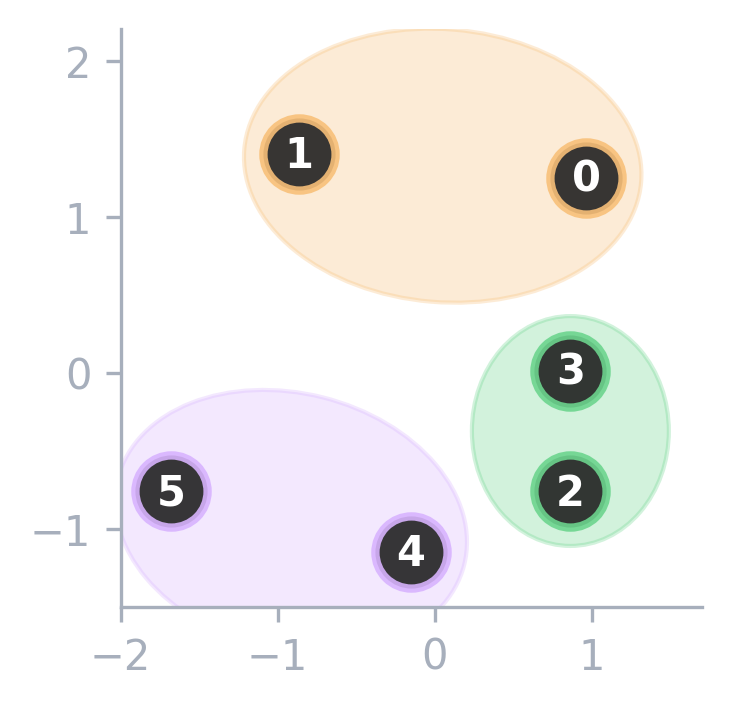

In [ ]:
from sklearn_extra.cluster import KMedoids

n_clusters = 3
clustering = KMedoids(n_clusters=n_clusters, random_state=42)
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<div class='markdown-google-sans'>

### **MiniBatchKMeans**
</div>
<img src="https://i.imgur.com/uWwmmyY.png" width=800 />


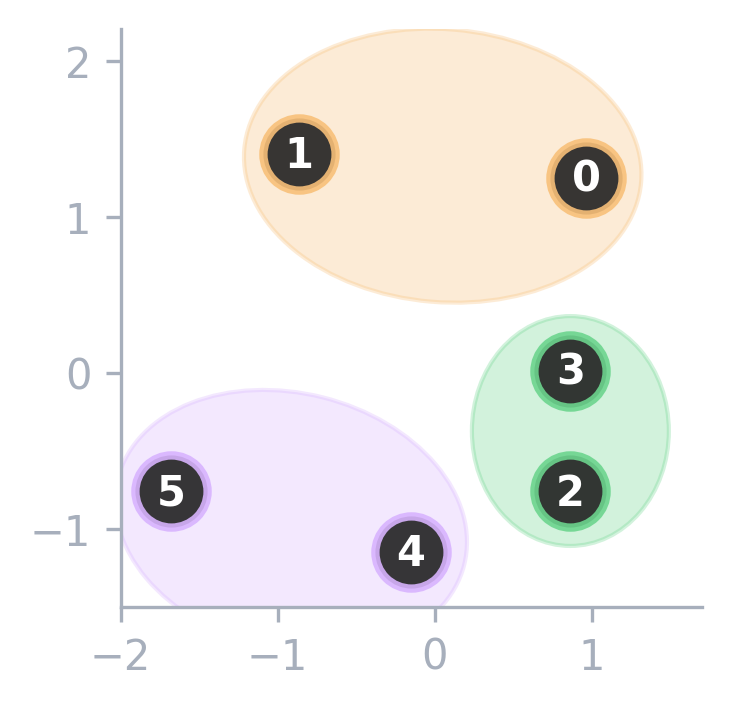

In [ ]:
from sklearn.cluster       import MiniBatchKMeans

n_clusters = 3
clustering = MiniBatchKMeans(n_clusters=n_clusters, batch_size=5, n_init=10,
                             random_state=42)
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<img src="https://i.imgur.com/cnndMvs.png" width=800 />

<img src="https://i.imgur.com/MAHVaJ1.png" width=800 />



<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Clustering: Centroid-based Summarized**
</div>

In [ ]:
!pip install umap-learn -q
!pip install scikit-learn-extra -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00


    Outlook  TemperatureMin  TemperatureMax  Humidity  ChanceOfRain  \
0  overcast            19.0            23.0      0.73          0.37   
1     sunny            25.9            28.5      0.74          0.00   
2     sunny            23.9            26.3      0.86          0.00   
3  overcast            11.5            17.4      0.53          0.32   
4     sunny            24.8            27.7      0.17          0.00   

   CloudCover WindSpeed  Holiday  NumPlayers  Play  
0        0.56    medium        0          16     1  
1        0.14    medium        1          33     0  
2        0.42       low        1          37     0  
3        0.76    medium        0          13     1  
4        0.07       low        1          35     0  


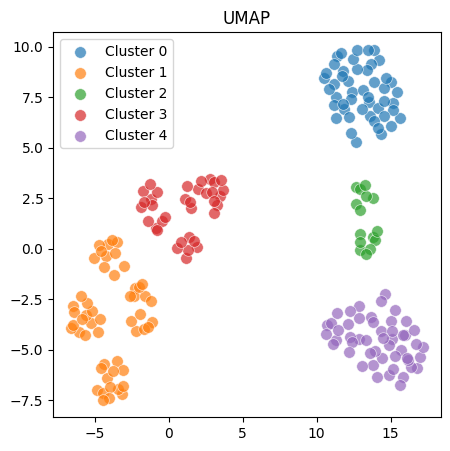

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer

from umap import UMAP

from sklearn.cluster       import KMeans
from sklearn.cluster       import MiniBatchKMeans
from sklearn_extra.cluster import KMedoids

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
print(df.head())

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=50, min_dist=0.75, spread=2, random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Perform clustering
n_clusters = 5
clustering = KMeans(n_clusters=n_clusters, n_init=10, random_state=42) #n_init to adjust the number of initialization
#clustering = KMedoids(n_clusters=n_clusters)
#clustering = MiniBatchKMeans(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_processed)

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in range(n_clusters):
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=f'Cluster {i}', s=70, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 10-1**
</div>

Perform KMeans clustering on this dataset. Adjust the value of k so it captures the clusters nicely.

In [ ]:
!pip install umap-learn -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer

from umap import UMAP

from sklearn.cluster       import KMeans

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df = df[df['Play']==1]

# Data Preparation
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=10, min_dist=1.5, spread=2,  random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)


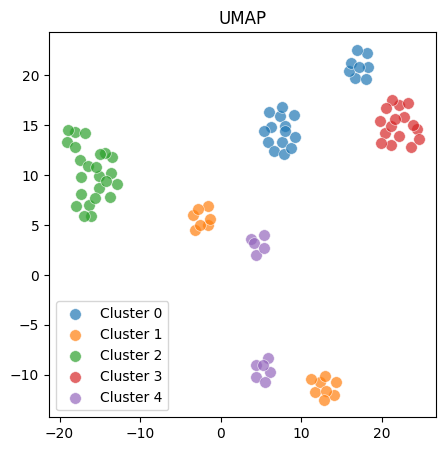

In [ ]:

# Perform clustering
n_clusters = 5
clustering = KMeans(n_clusters=n_clusters, n_init=10, random_state=42) #n_init to adjust the number of initialization
#clustering = KMedoids(n_clusters=n_clusters)
#clustering = MiniBatchKMeans(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_processed)

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in range(n_clusters):
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=f'Cluster {i}', s=70, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()
plt.show()

---
---

<div class='markdown-google-sans'>

## **10.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Clustering: Hierarchical**
</div>
<img src="https://i.imgur.com/ewr9QCG.png" width=800 />



<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function for drawing the points and cluster
def draw_data_points(df):
    X_train = df.copy()
    if 'Cluster' not in X_train.columns:
        X_train['Cluster'] = -1

    colors = ['#F8C079', '#6CD58E', '#D8B3FE', '#EBD15A', '#6ED5E5', '#F8A9C4', '#FFFFFF']

    # Calculate centroids and foci for each cluster
    centroids = X_train.groupby('Cluster')[[numerical_cols[0], numerical_cols[1]]].mean()
    foci = X_train.groupby('Cluster').apply(lambda x: x.iloc[np.argmax(np.sqrt(np.sum((x[[numerical_cols[0], numerical_cols[1]]] - centroids.loc[x.name])**2, axis=1)))])

    # Plot the data points and centroid ellipses
    plt.figure(figsize=(2.5, 2.5))
    for i, (x, y) in enumerate(zip(X_train[numerical_cols[0]], X_train[numerical_cols[1]])):
        plt.scatter(x, y, c='#212121', edgecolor=colors[X_train['Cluster'][i]], alpha=0.9, s=300, lw=2, zorder=3)
        plt.text(x, y-0.01, str(X_train.index[i]), color='white', fontsize=10, fontweight='bold', ha='center', va='center')

    for cluster, color in enumerate(colors):
        if cluster in centroids.index:
            center = centroids.loc[cluster]
            focal_point = foci.loc[cluster][[numerical_cols[0], numerical_cols[1]]]
            reflected_focal_point = 2 * center - focal_point
            distance = np.sqrt(np.sum((focal_point - center)**2))
            a = distance + 0.35
            b = np.sqrt(a**2 - distance**2)
            angle = np.arctan2(focal_point[numerical_cols[1]] - center[numerical_cols[1]], focal_point[numerical_cols[0]] - center[numerical_cols[0]])
            ellipse = matplotlib.patches.Ellipse(center, 2*a, 2*b, angle=np.degrees(angle), color=color, alpha=0.3)
            plt.gca().add_patch(ellipse)

    # Change the color of the axes and axis text
    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    ax.set_xlim([-2, 1.7])
    ax.set_ylim([-1.5, 2.2])
    plt.show()

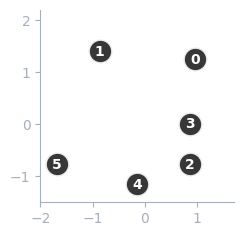

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Provided data
df = pd.DataFrame({
    'Temperature': [84,66,83,83,73,58],
    'Humidity': [73,75,47,57,42,47]
})

X_train = df.copy()

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

draw_data_points(X_train)

<div class='markdown-google-sans'>

### **<font color=#819A00> Agglomerative Clustering**
</div>
<img src="https://i.imgur.com/4popa8q.png" width=800 />

<img src="https://i.imgur.com/MYsdVAk.png" width=800 />

<img src="https://i.imgur.com/zJqKwLX.png" width=800 />

<img src="https://i.imgur.com/uRWAeRo.png" width=800 />

<img src="https://i.imgur.com/mkU92Mw.png" width=800 />

<img src="https://i.imgur.com/GDUYsap.png" width=800 />

<img src="https://i.imgur.com/MLiJvbm.png" width=800 />

<img src="https://i.imgur.com/3NTkkvq.png" width=800 />

<img src="https://i.imgur.com/23E9DT2.png" width=800 />


<img src="https://i.imgur.com/udiNhCf.png" width=800 />

<img src="https://i.imgur.com/locR9HN.png" width=800 />



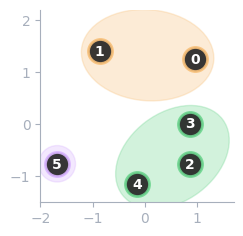

In [ ]:
from sklearn.cluster       import AgglomerativeClustering

n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=3,
                                     linkage='ward')
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

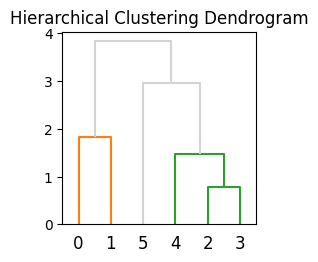

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(X_train, method='ward') #'complete', 'average', 'single'

# Plot the dendrogram
plt.figure(figsize=(2.5, 2.5))
dendrogram(Z, color_threshold=2.5, above_threshold_color='lightgrey')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

<div class='markdown-google-sans'>

### **<font color=#819A00> BIRCH**
</div>
<img src="https://i.imgur.com/wXPGMek.png" width=800 />

<img src="https://i.imgur.com/NAnMJBw.png" width=800 />

<img src="https://i.imgur.com/HMRumXw.png" width=800 />

<img src="https://i.imgur.com/Kdiedeq.png" width=800 />

<img src="https://i.imgur.com/wZZTQok.png" width=800 />

<img src="https://i.imgur.com/8Y3OZjI.png" width=800 />

<img src="https://i.imgur.com/sSU4yQu.png" width=800 />

<img src="https://i.imgur.com/Wv3F565.png" width=800 />

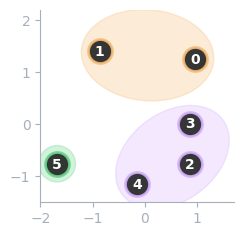

In [ ]:
from sklearn.cluster       import Birch

n_clusters = 3
clustering = Birch(threshold=0.8, n_clusters=3)
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<div class='markdown-google-sans'>

### **<font color=#819A00> Spectral Clustering**
</div>
<img src="https://i.imgur.com/CO0PuQ6.png" width=800 />

<img src="https://i.imgur.com/kCgbsbt.png" width=800 />

<img src="https://i.imgur.com/8YGnHTR.png" width=800 />

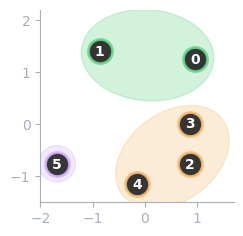

In [ ]:
from sklearn.cluster       import SpectralClustering

n_clusters = 3
clustering = SpectralClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Clustering: Hierarchical-based Summarized**
</div>

In [ ]:
!pip install umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00


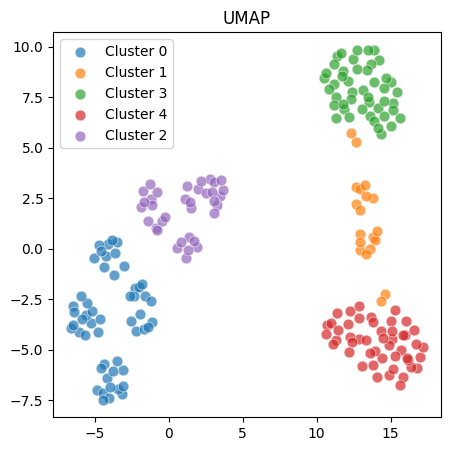

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer

from umap import UMAP

from sklearn.cluster import AgglomerativeClustering, Birch, SpectralClustering

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=50, min_dist=0.75, spread=2, random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Perform clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                     linkage='ward') #'complete', 'average', 'single'
#clustering = Birch(n_clusters=n_clusters, threshold=0.2)
#clustering = SpectralClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_processed)

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in X['Cluster'].unique():
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=f'Cluster {i}', s=60, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()
plt.show()

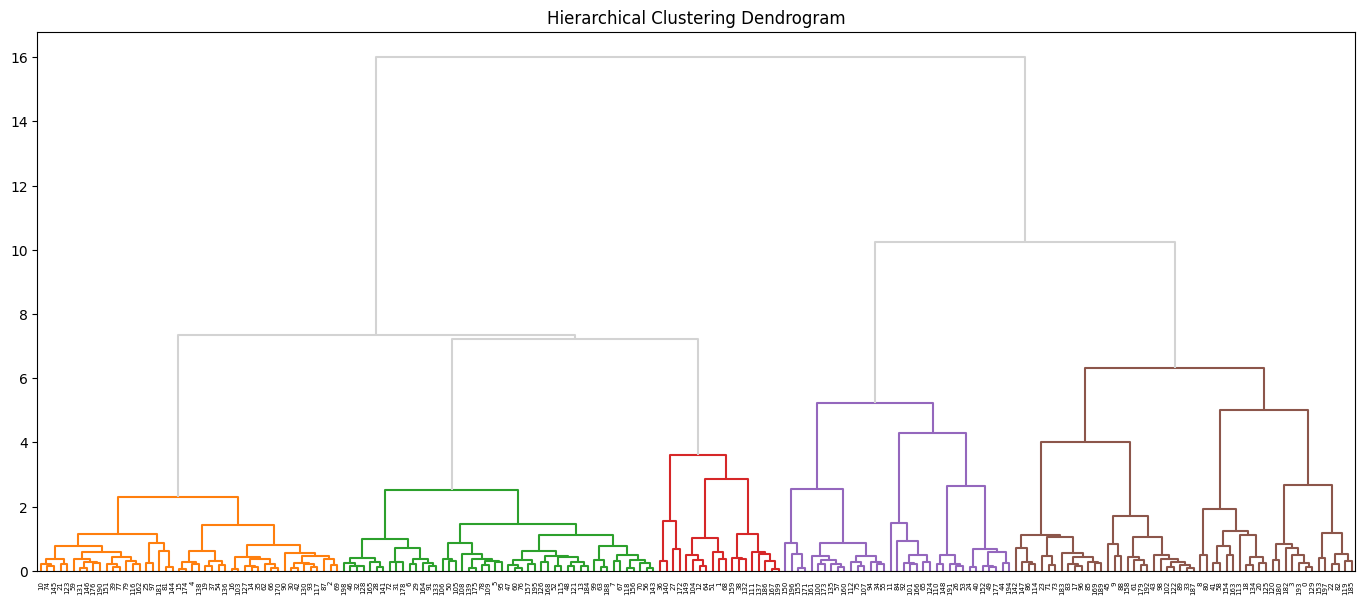

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(X_processed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(17, 7))
dendrogram(Z, color_threshold=6.5, above_threshold_color='lightgrey')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 10-2**
</div>

Perform Agglomerative clustering on this dataset with any linkage method, using the same number of cluster as 10-1. Draw the dendrogram as well.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from umap import UMAP

from sklearn.cluster         import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df = df[df['Play']==1]

# Data Preparation
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=10, min_dist=1.5, spread=2,  random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

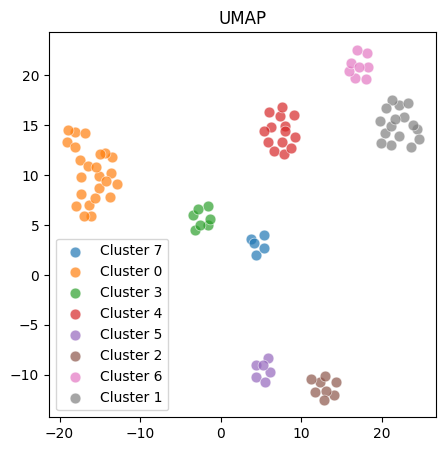

In [ ]:
# Answer
# Perform clustering
n_clusters = 8
clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                     linkage='ward') #'complete', 'average', 'single'
#clustering = Birch(n_clusters=n_clusters, threshold=0.2)
#clustering = SpectralClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(X_processed)

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in X['Cluster'].unique():
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=f'Cluster {i}', s=60, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()
plt.show()

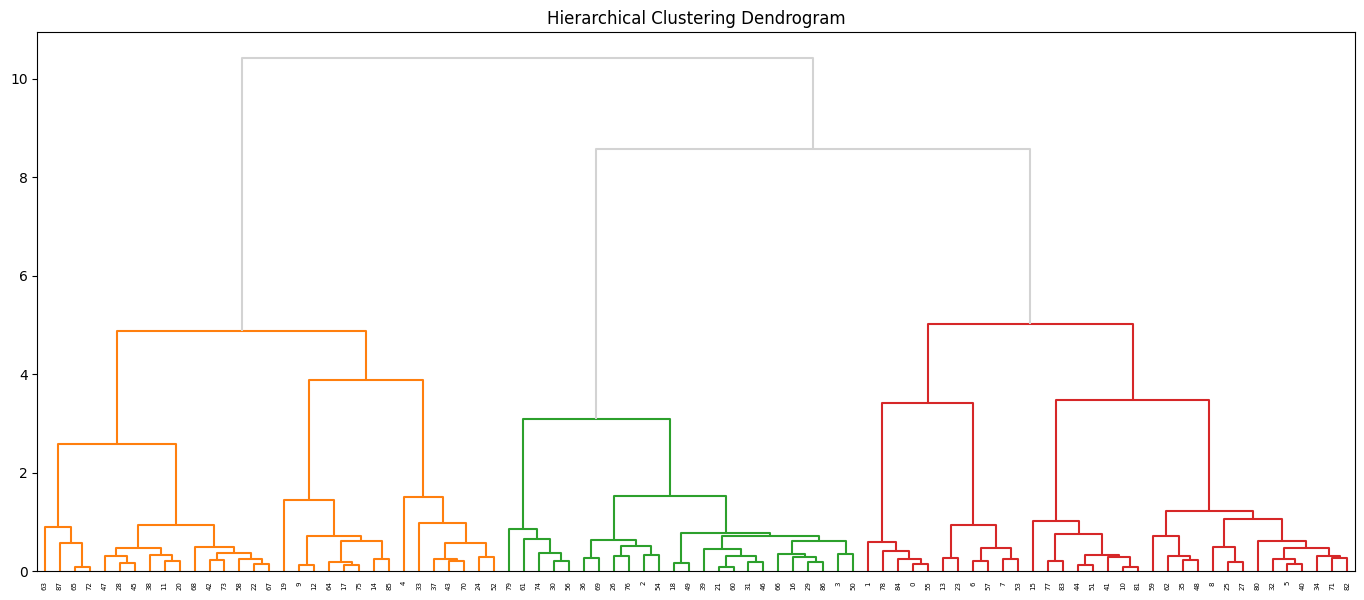

In [ ]:
# Draw dendrogram here
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(X_processed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(17, 7))
dendrogram(Z, color_threshold=6.5, above_threshold_color='lightgrey')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

---
---

<div class='markdown-google-sans'>

## **10.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Clustering: Density-based**
</div>
<img src="https://i.imgur.com/lwQEw1e.png" width=800 />



<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Function for drawing the points and cluster
def draw_data_points(df):
    X_train = df.copy()
    if 'Cluster' not in X_train.columns:
        X_train['Cluster'] = -1

    colors = ['#F8C079', '#6CD58E', '#D8B3FE', '#EBD15A', '#6ED5E5', '#F8A9C4', '#FFFFFF']

    # Calculate centroids and foci for each cluster
    centroids = X_train.groupby('Cluster')[[numerical_cols[0], numerical_cols[1]]].mean()
    foci = X_train.groupby('Cluster').apply(lambda x: x.iloc[np.argmax(np.sqrt(np.sum((x[[numerical_cols[0], numerical_cols[1]]] - centroids.loc[x.name])**2, axis=1)))])

    # Plot the data points and centroid ellipses
    plt.figure(figsize=(2.5, 2.5))
    for i, (x, y) in enumerate(zip(X_train[numerical_cols[0]], X_train[numerical_cols[1]])):
        plt.scatter(x, y, c='#212121', edgecolor=colors[X_train['Cluster'][i]], alpha=0.9, s=300, lw=2, zorder=3)
        plt.text(x, y-0.01, str(X_train.index[i]), color='white', fontsize=10, fontweight='bold', ha='center', va='center')

    for cluster, color in enumerate(colors):
        if cluster in centroids.index:
            center = centroids.loc[cluster]
            focal_point = foci.loc[cluster][[numerical_cols[0], numerical_cols[1]]]
            reflected_focal_point = 2 * center - focal_point
            distance = np.sqrt(np.sum((focal_point - center)**2))
            a = distance + 0.35
            b = np.sqrt(a**2 - distance**2)
            angle = np.arctan2(focal_point[numerical_cols[1]] - center[numerical_cols[1]], focal_point[numerical_cols[0]] - center[numerical_cols[0]])
            ellipse = matplotlib.patches.Ellipse(center, 2*a, 2*b, angle=np.degrees(angle), color=color, alpha=0.3)
            plt.gca().add_patch(ellipse)

    # Change the color of the axes and axis text
    ax = plt.gca()
    text_color = '#a7afbc'
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(text_color)
    ax.spines['left'].set_color(text_color)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)

    ax.set_xlim([-2, 1.7])
    ax.set_ylim([-1.5, 2.2])
    plt.show()

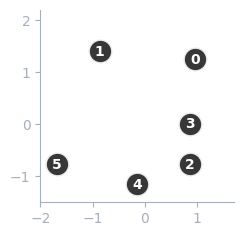

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Provided data
df = pd.DataFrame({
    'Temperature': [84,66,83,83,73,58],
    'Humidity': [73,75,47,57,42,47]
})

X_train = df.copy()

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

draw_data_points(X_train)

<div class='markdown-google-sans'>

### **DBSCAN**
</div>
<img src="https://i.imgur.com/AHiJeIW.png" width=800 />



<img src="https://i.imgur.com/cpEeyej.png" width=800 />

<img src="https://i.imgur.com/U3PAH11.png" width=800 />

<img src="https://i.imgur.com/gA3RdaL.png" width=800 />

<img src="https://i.imgur.com/zYj2iYP.png" width=800 />

<img src="https://i.imgur.com/Ijll980.png" width=800 />

<img src="https://i.imgur.com/xAcEnKH.png" width=800 />

<img src="https://i.imgur.com/9r5sxvB.png" width=800 />


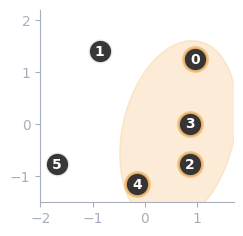

In [ ]:
from sklearn.cluster       import DBSCAN

n_clusters = 3
clustering = DBSCAN(eps=1.6, min_samples=3, algorithm='brute')
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<div class='markdown-google-sans'>

### **OPTICS**
</div>
<img src="https://i.imgur.com/LK0hN9b.png" width=800 />


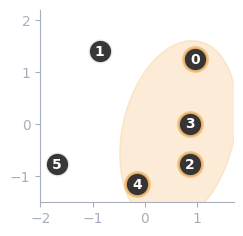

In [ ]:
from sklearn.cluster       import OPTICS

clustering = OPTICS(min_samples=2, max_eps=1.25,  algorithm='brute')
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<div class='markdown-google-sans'>

### **MeanShift**
</div>
<img src="https://i.imgur.com/sOasE5y.png" width=800 />


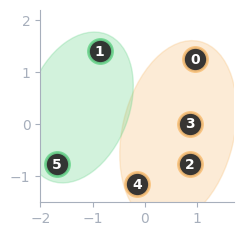

In [ ]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=1.8)
cluster_labels = clustering.fit_predict(X_train)

# Add cluster labels to the DataFrame
X_train['Cluster'] = cluster_labels

# Call the drawing function with the DataFrame
draw_data_points(X_train)

<img src="https://i.imgur.com/9mTt5Id.png" width=800 />

<img src="https://i.imgur.com/3Evd1wk.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Clustering: Density-based Summarized**
</div>

In [ ]:
!pip install umap-learn -q

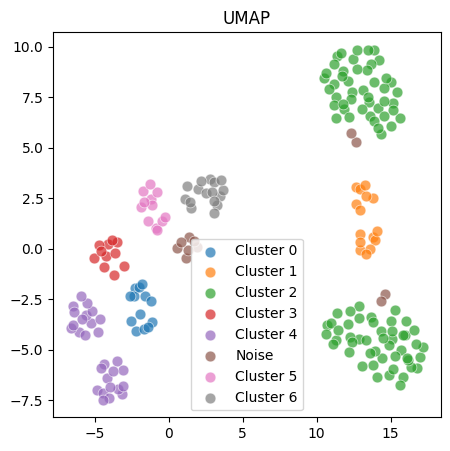

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose       import ColumnTransformer

from umap import UMAP

from sklearn.cluster import DBSCAN, OPTICS, MeanShift

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)


# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=50, min_dist=0.75, spread=2, random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Perform clustering
clustering = DBSCAN(eps=1.4, min_samples=10)
# clustering = OPTICS(min_samples=10)
#clustering = MeanShift(bandwidth=1.4)
cluster_labels = clustering.fit_predict(X_processed)

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in X['Cluster'].unique():
    label = f'Cluster {i}' if i != -1 else 'Noise'
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=label, s=60, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 10-3**
</div>

Perform MeanShift on this dataset. Adjust the values of bandwidth appropriately.

In [ ]:
!pip install umap-learn -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from umap import UMAP

from sklearn.cluster         import MeanShift

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df = df[df['Play']==1]

# Data Preparation
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=20, min_dist=1, spread=2,  random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)


In [ ]:
# Answer

# Perform clustering
clustering = DBSCAN(eps=1.4, min_samples=10)
# clustering = OPTICS(min_samples=10)
#clustering = MeanShift(bandwidth=1.4)
cluster_labels = clustering.fit_predict(X_processed)

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in X['Cluster'].unique():
    label = f'Cluster {i}' if i != -1 else 'Noise'
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=label, s=60, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()
plt.show()

NameError: name 'DBSCAN' is not defined

---
---

<div class='markdown-google-sans'>

## **10.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Clustering Validation**
</div>
<img src="https://i.imgur.com/pdcLzE2.png" width=800 />

<img src="https://i.imgur.com/xLhf2Z9.png" width=800 />

<img src="https://i.imgur.com/nTRqKXH.png" width=800 />

<img src="https://i.imgur.com/wxjQ0bF.png" width=800 />



<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

In [ ]:
# Basic Libraries
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.pipeline       import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer

# Dimensionality Reduction
#!pip install umap-learn -q
from umap import UMAP

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Data Preparation
X_train = df.drop(['Play'], axis=1)

X_train.round(2)

<div class='markdown-google-sans'>

### **<font color=#819A00> Internal Metrics**
</div>
<img src="https://i.imgur.com/b6Fqbdc.png" width=800 />


<div class='markdown-google-sans'>

#### **Silhouette Score**
</div>
<img src="https://i.imgur.com/eZ8L8Lb.png" width=800 />


<img src="https://i.imgur.com/BL9bLAL.png" width=800 />

<img src="https://i.imgur.com/uoBrVj1.png" width=800 />

<img src="https://i.imgur.com/2uvaXvf.png" width=800 />

<img src="https://i.imgur.com/21tkB2D.png" width=800 />

<img src="https://i.imgur.com/jgr9Elo.png" width=800 />

<img src="https://i.imgur.com/8UgBMz0.png" width=800 />

<img src="https://i.imgur.com/0diaui6.png" width=800 />


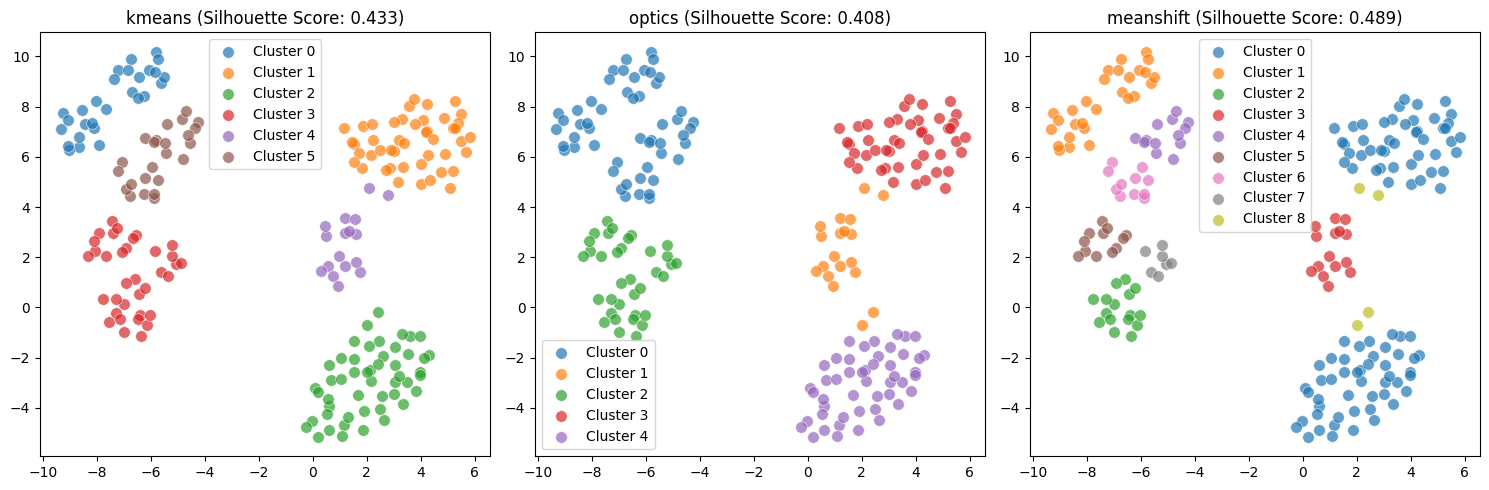

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from umap import UMAP

from sklearn.cluster       import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics       import silhouette_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=30, min_dist=1, random_state=41, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Define clustering algorithms and their parameters
algorithms = [
    ('KMeans', KMeans(n_clusters=6, n_init=10, random_state=0)),
    ('OPTICS', AgglomerativeClustering(n_clusters=5, linkage='ward')),
    ('MeanShift', MeanShift(bandwidth=1.418))
]

# Perform clustering and plot the results
fig, axs = plt.subplots(1, len(algorithms), figsize=(15, 5))

for i, (name, algorithm) in enumerate(algorithms):
    labels = algorithm.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    n_clusters = len(np.unique(labels))

    for j in range(n_clusters):
        axs[i].scatter(X_transformed[labels == j, 0], X_transformed[labels == j, 1],
                       label=f'Cluster {j}', s=70, alpha=0.7, edgecolor='w', lw=0.5)
    axs[i].set_title(f"{name} (Silhouette Score: {score:.3f})")
    axs[i].legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

#### **Davies-Bouldin Index**
</div>
<img src="https://i.imgur.com/wtnBVuS.png" width=800 />



<img src="https://i.imgur.com/AIeK2FY.png" width=800 />

<img src="https://i.imgur.com/DIwlTAg.png" width=800 />


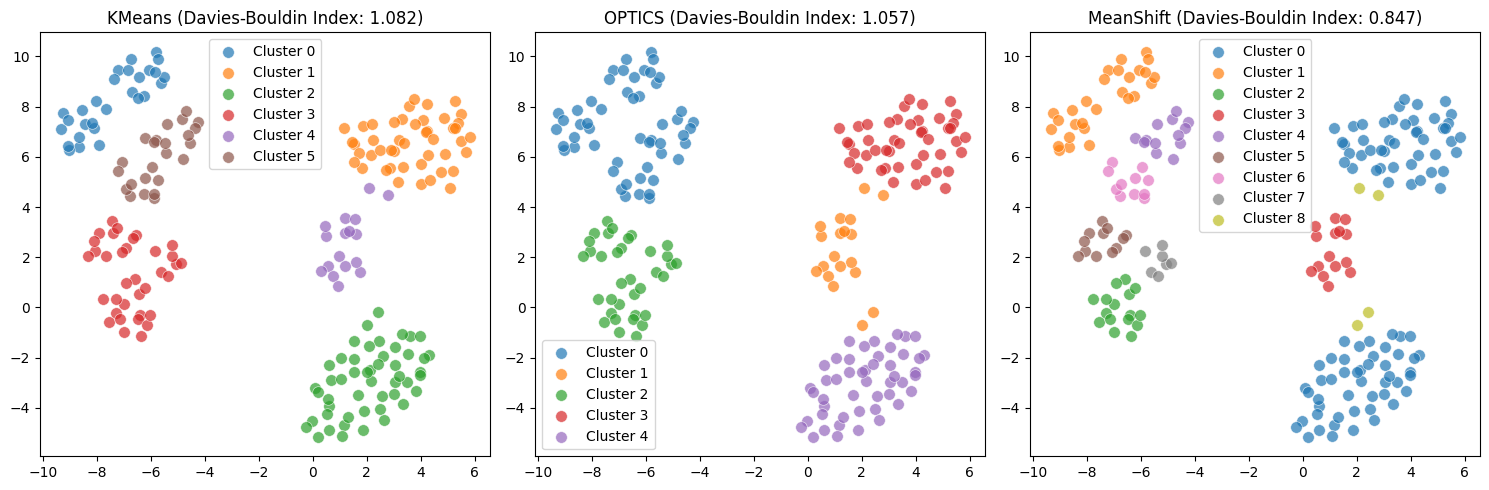

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from umap import UMAP

from sklearn.cluster       import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics       import davies_bouldin_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=30, min_dist=1, random_state=41, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Define clustering algorithms and their parameters
algorithms = [
    ('KMeans', KMeans(n_clusters=6, n_init=10, random_state=0)),
    ('OPTICS', AgglomerativeClustering(n_clusters=5, linkage='ward')),
    ('MeanShift', MeanShift(bandwidth=1.418))
]

# Perform clustering and plot the results
fig, axs = plt.subplots(1, len(algorithms), figsize=(15, 5))

for i, (name, algorithm) in enumerate(algorithms):
    labels = algorithm.fit_predict(X_processed)
    score = davies_bouldin_score(X_processed, labels)
    n_clusters = len(np.unique(labels))

    for j in range(n_clusters):
        axs[i].scatter(X_transformed[labels == j, 0], X_transformed[labels == j, 1],
                       label=f'Cluster {j}', s=70, alpha=0.7, edgecolor='w', lw=0.5)
    axs[i].set_title(f"{name} (Davies-Bouldin Index: {score:.3f})")
    axs[i].legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

#### **Calinski-Harabasz Index**
</div>
<img src="https://i.imgur.com/a49KUe7.png" width=800 />


<img src="https://i.imgur.com/ofNa8j2.png" width=800 />

<img src="https://i.imgur.com/jm9vueB.png" width=800 />


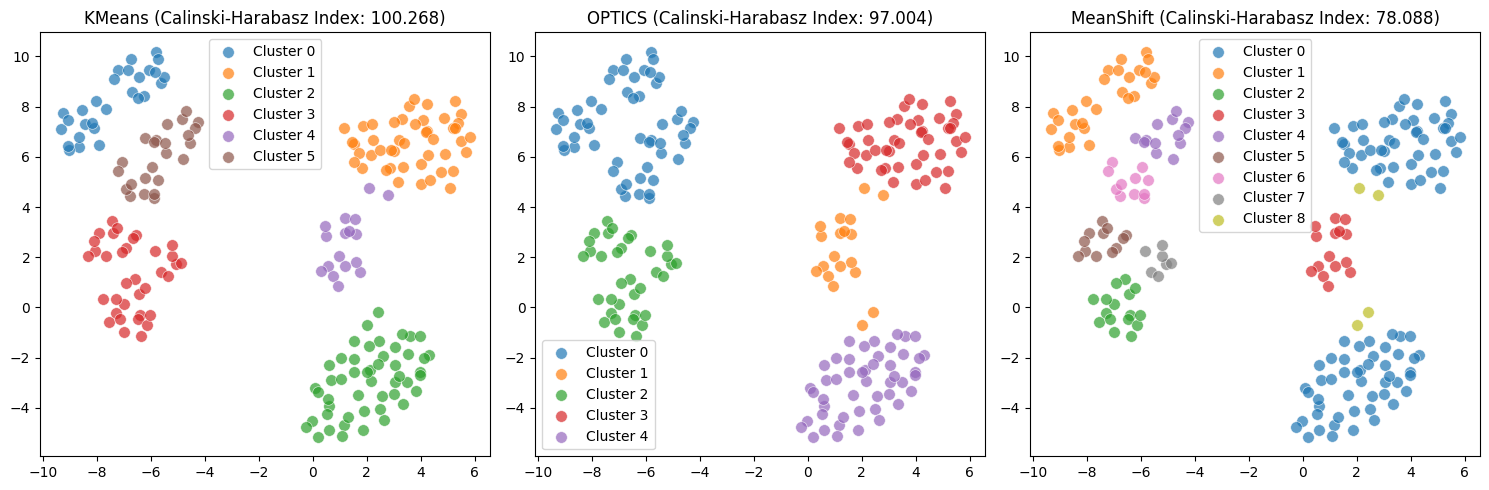

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from umap import UMAP

from sklearn.cluster       import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics       import calinski_harabasz_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=30, min_dist=1, random_state=41, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Define clustering algorithms and their parameters
algorithms = [
    ('KMeans', KMeans(n_clusters=6, n_init=10, random_state=0)),
    ('OPTICS', AgglomerativeClustering(n_clusters=5, linkage='ward')),
    ('MeanShift', MeanShift(bandwidth=1.418))
]

# Perform clustering and plot the results
fig, axs = plt.subplots(1, len(algorithms), figsize=(15, 5))

for i, (name, algorithm) in enumerate(algorithms):
    labels = algorithm.fit_predict(X_processed)
    score = calinski_harabasz_score(X_processed, labels)
    n_clusters = len(np.unique(labels))

    for j in range(n_clusters):
        axs[i].scatter(X_transformed[labels == j, 0], X_transformed[labels == j, 1],
                       label=f'Cluster {j}', s=70, alpha=0.7, edgecolor='w', lw=0.5)
    axs[i].set_title(f"{name} (Calinski-Harabasz Index: {score:.3f})")
    axs[i].legend()

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/NqXJNga.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> External Metrics**
</div>
<img src="https://i.imgur.com/ROmyTzg.png" width=800 />


<div class='markdown-google-sans'>

#### **Adjusted Rand Index**
</div>
<img src="https://i.imgur.com/TU4KgTg.png" width=800 />



<img src="https://i.imgur.com/OB5YD4b.png" width=800 />

<img src="https://i.imgur.com/kuJfrth.png" width=800 />

<img src="https://i.imgur.com/WogDKMh.png" width=800 />


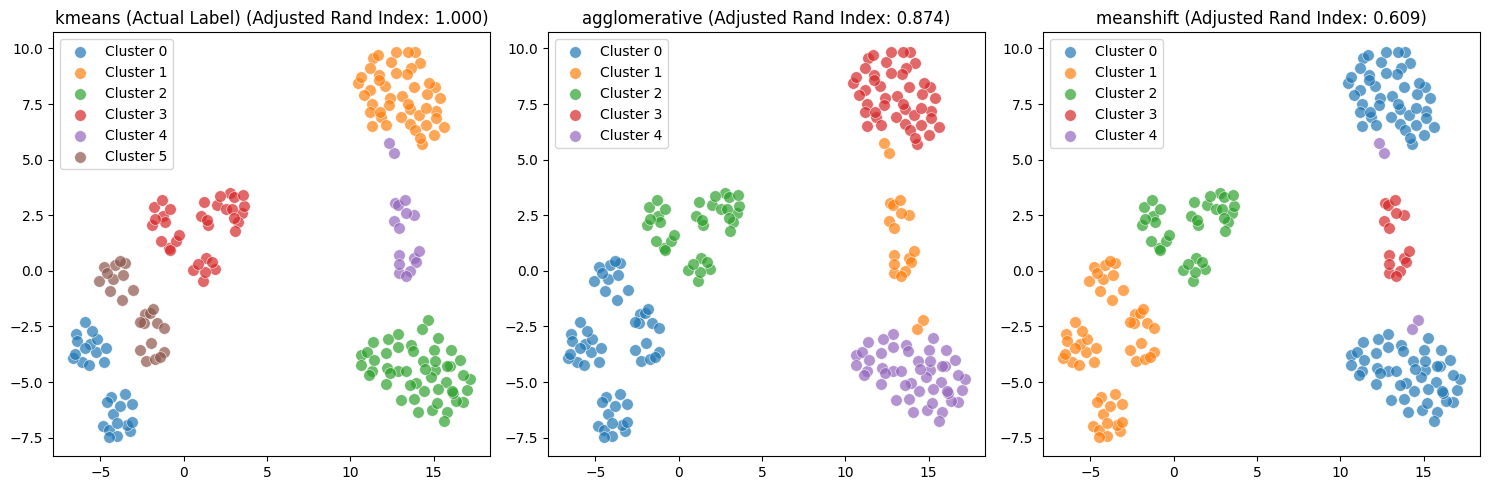

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from umap import UMAP

from sklearn.cluster       import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics       import adjusted_rand_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X = df.drop(['Play'], axis=1)

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=50, min_dist=0.75, spread=2, random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Define clustering algorithms and their parameters
algorithms = [
    ('kmeans (Actual Label)', KMeans(n_clusters=6, n_init=10, random_state=0)),
    ('agglomerative', AgglomerativeClustering(n_clusters=5, linkage='ward')),
    ('meanshift', MeanShift(bandwidth=1.418))
]

# Perform clustering and plot the results
fig, axs = plt.subplots(1, len(algorithms), figsize=(15, 5))

# Assuming KMeans result as the actual cluster
kmeans = KMeans(n_clusters=6, n_init=10, random_state=0)
actual_labels = kmeans.fit_predict(X_processed)

for i, (name, algorithm) in enumerate(algorithms):
    labels = algorithm.fit_predict(X_processed)
    score = adjusted_rand_score(actual_labels, labels)
    n_clusters = len(np.unique(labels))

    for j in range(n_clusters):
        axs[i].scatter(X_transformed[labels == j, 0], X_transformed[labels == j, 1],
                       label=f'Cluster {j}', s=70, alpha=0.7, edgecolor='w', lw=0.5)
    axs[i].set_title(f"{name} (Adjusted Rand Index: {score:.3f})")
    axs[i].legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Clustering Validation Summarized**
</div>

In [ ]:
!pip install umap-learn -q

Score: 1.056517997063718


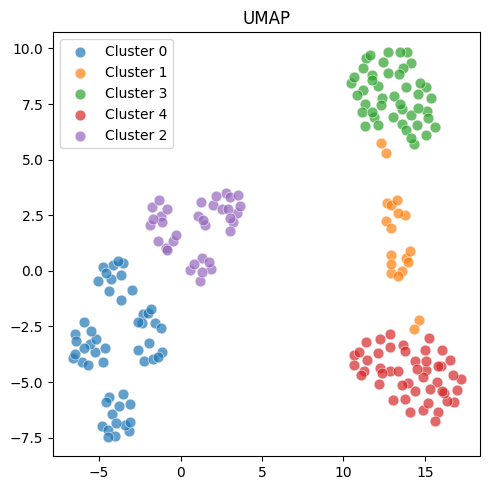

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer

from umap import UMAP

from sklearn.cluster import DBSCAN, OPTICS, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Separate features variable
X, y = df.drop(['Play'], axis=1), df['Play']

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=50, min_dist=0.75, spread=2, random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Perform clustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = clustering.fit_predict(X_processed)

# Calculate the score
#score = silhouette_score(X_processed, cluster_labels)
score = davies_bouldin_score(X_processed, cluster_labels)
#score = calinski_harabasz_score(X_processed, cluster_labels)
#score = adjusted_rand_score(cluster_labels, y)
print(f'Score: {score}')

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in X['Cluster'].unique():
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=f'Cluster {i}', s=60, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 10-4**
</div>

Calculate the Adjusted Rand Index of the result from KMeans and the actual label (y). The visualization and preprocessing is already done for you.

Score: 0.5111465486616847


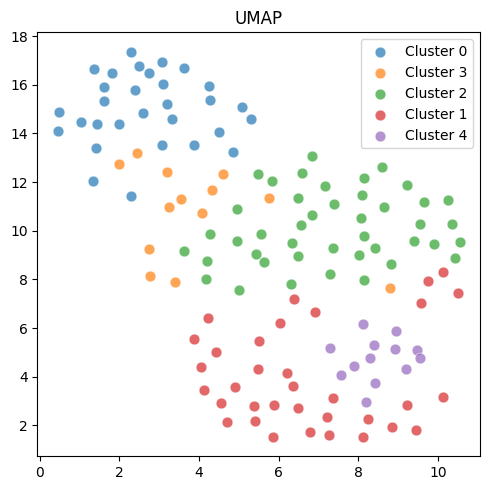

In [ ]:
# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/hdvpl2iwahxf9nyknn49n/golf_practice_dataset_mini_clustering-2.csv?rlkey=fzk67hdbuiig1tm8vwbhi23zo&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col=0)

# Data Preparation
X, y = df.drop(['Cluster'], axis=1), df['Cluster']

# Preprocess the data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

###########

# Perform dimensionality reduction for visualization
umap = UMAP(n_neighbors=50, min_dist=0.75, spread=2, random_state=42, n_jobs=1)
X_transformed = umap.fit_transform(X_processed)

# Perform clustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = clustering.fit_predict(X_processed)

# Calculate the score
#score = silhouette_score(X_processed, cluster_labels)
# score = davies_bouldin_score(X_processed, cluster_labels)
#score = calinski_harabasz_score(X_processed, cluster_labels)
score = adjusted_rand_score(cluster_labels, y)
print(f'Score: {score}')

# Add cluster labels to the DataFrame
X['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
for i in X['Cluster'].unique():
    plt.scatter(X_transformed[cluster_labels == i, 0], X_transformed[cluster_labels == i, 1],
                label=f'Cluster {i}', s=60, alpha=0.7, edgecolor='w', lw=0.5)
plt.title("UMAP")
plt.legend()

plt.tight_layout()
plt.show()
